In [1]:
import os
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 15})

CORR = 0.75

lambdas = (np.linspace(0,1,11))
root_dir = os.path.join("..","experiments", "agents_4",  "corr_%.2f"%(CORR))

print("*** DA, TTC, RSD ***")
with open(os.path.join(root_dir, "baselines", "data.p"), 'rb') as f:
    data = pickle.load(f)
    
lambdas = (np.linspace(0,1,11))

RSD_ST = data['RSD_ST']
RSD_IC = data['RSD_IC']

DA_ST = data['DA_ST']
DA_IC = data['DA_IC']

TTC_ST =  data['TTC_ST']
TTC_IC =  data['TTC_IC']

ST_1 = data['COMBO_RSD_TTC_ST']
IC_1 = data['COMBO_RSD_TTC_IC']

ST_2 = data['COMBO_TTC_DA_ST']
IC_2 = data['COMBO_TTC_DA_IC']


print("*** CNN ***")
ST_CNN = []
IC_CNN = []
for lambd in np.linspace(0,1,11):
    try:
        data = open(os.path.join(root_dir, "CNN","LOG_lambd_%.4f"%(lambd))).readlines()[-1]
        print("%.2f"%lambd, data)
        ST_CNN.append(float(data.split(" ")[-3][:-1]))
        IC_CNN.append(float(data.split(" ")[-1][:-1]))
    except:
        print("\n")
        
ST_CNN = np.array(ST_CNN)
IC_CNN = np.array(IC_CNN)

print("*** MLP ***")
ST_MLP = []
IC_MLP = []
for lambd in np.linspace(0,1,11):
    try:
        data = open(os.path.join(root_dir,"MLP","LOG_lambd_%.4f"%(lambd))).readlines()[-1]
        print("%.2f"%lambd, data)
        ST_MLP.append(float(data.split(" ")[-3][:-1]))
        IC_MLP.append(float(data.split(" ")[-1][:-1]))
    except:
        print("\n")
        
ST_MLP = np.array(ST_MLP)
IC_MLP = np.array(IC_MLP)

*** DA, TTC, RSD ***
*** CNN ***
0.00 2024-06-23 02:59:11,420:INFO:	[TEST]: 50000, [stv]: 0.196378, [rgt]: 0.000000

0.10 2024-06-23 02:59:12,950:INFO:	[TEST]: 50000, [stv]: 0.022431, [rgt]: 0.002336

0.20 2024-06-23 00:21:06,949:INFO:	[TEST]: 50000, [stv]: 0.010997, [rgt]: 0.003708

0.30 2024-06-23 00:23:35,003:INFO:	[TEST]: 50000, [stv]: 0.000326, [rgt]: 0.001886

0.40 2024-06-23 00:33:44,632:INFO:	[TEST]: 50000, [stv]: 0.000272, [rgt]: 0.002371

0.50 2024-06-23 04:43:12,020:INFO:	[TEST]: 50000, [stv]: 0.000292, [rgt]: 0.002594

0.60 2024-06-23 09:48:08,090:INFO:	[TEST]: 50000, [stv]: 0.000288, [rgt]: 0.002589

0.70 2024-06-23 00:27:29,195:INFO:	[TEST]: 50000, [stv]: 0.000265, [rgt]: 0.002389

0.80 2024-06-23 07:11:27,806:INFO:	[TEST]: 50000, [stv]: 0.000221, [rgt]: 0.003200

0.90 2024-06-23 00:27:13,793:INFO:	[TEST]: 50000, [stv]: 0.000126, [rgt]: 0.004707

1.00 2024-06-22 14:54:08,525:INFO:	[TEST]: 50000, [stv]: 0.000464, [rgt]: 0.020174

*** MLP ***
0.00 2024-06-21 20:04:24,407:IN

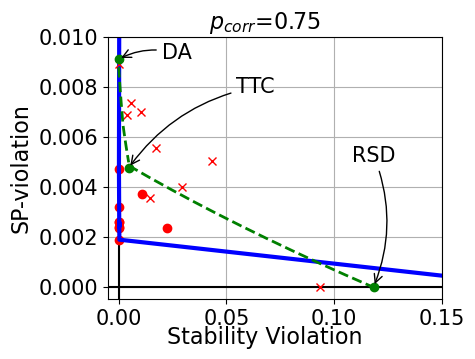

In [4]:
idx = idx = [0,3,4,5,7,8,9,10]

f,ax = plt.subplots(1,1, facecolor='w', figsize=(4, 3))
f.tight_layout(pad = 0.0)


ax.grid()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_ylabel("SP-violation", fontsize=16)

ax.plot(ST_CNN, IC_CNN, "ro", markersize = 6.0)
ax.plot(ST_CNN[idx], IC_CNN[idx], linewidth = 3.0, color = "b")

ax.plot(ST_MLP, IC_MLP, "rx", markersize = 6.0)


ax.plot(ST_1, IC_1, linewidth = 2.0, color = "g", ls = "dashed")
ax.plot(ST_2, IC_2, linewidth = 2.0, color = "g", ls = "dashed")

ax.plot(DA_ST, DA_IC, "go", markersize = 6.0)
ax.plot(RSD_ST, RSD_IC, "go", markersize = 6.0)
ax.plot(TTC_ST, TTC_IC, "go", markersize = 6.0)

ax.annotate('DA',
            xy=(0.0, DA_IC), xycoords='data', fontsize = 15,
            xytext=(2e-2, DA_IC), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

ax.annotate('RSD',
            xy=(RSD_ST, 0.0), xycoords='data', fontsize = 15,
            xytext=(RSD_ST - 0.01, 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))

ax.annotate('TTC',
            xy=(TTC_ST, TTC_IC), xycoords='data', fontsize = 15,
            xytext=(TTC_ST + 0.05, TTC_IC + 0.003), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

fs = 12

ax.set_xlim([-5e-3, 0.15])
ax.set_ylim([-5e-3/10, 0.01])


f.text(0.5, -0.05, 'Stability Violation', ha='center', size = 16)
_ = f.text(0.5, 1, r'$p_{corr}$=%.2f'%(CORR), ha='center', size = 16)